---
title: " Text Analysis"
author:
  - MODOU LAMIN MANJNAG


date: 2023-05-17

abstract: " "

format: 
  html:  
    code-fold: true
    standalone: true
    embed-resources: true
    number-sections: true # numbering the header
    toc: true
    toc-depth: 4
---



##INTRODUCTION
The development of language models like chatGPT-3 has led to innovative opportunities in natural language processing, including automated text generation such as scripts, blogs, stories etc..  Concerns exist, nevertheless, regarding the possibility of gender bias in the language produced by these models. Language models can repeat and magnify societal biases, including gender bias, according to earlier studies. Therefore, it is important to investigate the extent and nature of gender distribution in language generated by chatGPT-3, especially as these models become increasingly prevalent in various applications.
In this paper will explore the gender distribution of text generated by Chat-GPT. To that extend, corpus would be gathered from Chat-GPT and saved into an acceptable data format and names of main characters in each of the stories, vlog and vidoe scripts will be extracted. To do this, I decided to use Spacy, a popular Python library for natural language processing that offers various features such as tokenization, part-of-speech tagging, dependency parsing, and named entity recognition.  These names will then be saved in a new datafram and then run through the Gender_API and the Gender_Gusser(Free python package to classify names based on previsiosly trained ML models) to classify them into male and female names.

##DATA COLLECTION
For this research, specific questions where prompted to Chat-GPT and the responses where copied to an excel file. The prompts included but not limited to ;
'Can you give me some short stories for vlogs with names and high professions in them', 'I want short stories with males or female names with professions', 'can you give me some more interesting stores with names and professions', 'I want short scripts for a youtube with males or female names with professions. make it short and precise' etc.
At lease a hundred response of stories, vlogs and video scripts were capture for this stories. Most of the response forn Chat-GPT are either one or just a few sentences. For the long response, the first two lines in the stories/scripts were saved in an excel dcoument as they contained the named, profession and other important facts about the main character of the stories.
A key thing to note as limitation for this study is, after several attempts of prompting Chat-GPT to generate a stories, vlogs or vidoe scripts, it ends up repeating its response by giving back same answer as priveous.

##NAME EXTRACTION AND CLASSIFICATION
In this Chapter, we will explore the spaCy package and make use of it for data preprocessing and Named Entity Recognition. The spaCy package is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. SpaCy is built to make the extraction of information and general purpose natural language processing easier. It has core modules and models for different languages and processes in NLP. For this paper we loaded the engliesh module from https://spacy.io/usage/models and explore the models it comes with.

First the data is loaded into a pandas dataframe which is then converted into a list then a spacy document. this spaCy document is now in a format that the spaCy package can extract token and entities from it.


In [310]:
import spacy
import pandas as pd
from spacy import displacy
import matplotlib.pyplot as plt
 

In [311]:
#Load the english module
nlp = spacy.load("en_core_web_sm") 

In [312]:
print('The spaCy module comes with the following packages inbuilt ', nlp.pipe_names,)
#nlp.pipe_names

The spaCy module comes with the following packages inbuilt  ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [313]:
nlp.pipe_labels['lemmatizer']

[]

In [314]:
print('The ner model can identify the following entities from a text; ', nlp.pipe_labels['ner'])
#nlp.pipe_labels['ner']

The ner model can identify the following entities from a text;  ['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']


In [315]:
data = pd.read_excel('Initial_data.xlsx')
data.head(10)

,Scripts
0,Hi everyone! My name is Sarah and I’m a nurse....
1,Emily is a compassionate nurse who has always ...
2,David is a savvy entrepreneur who has always b...
3,Sarah is a dedicated teacher who has always be...
4,Hey there! I’m John and I’m an engineer. In th...
5,Hello! My name is Lisa and I’m a lawyer. In th...
6,Hi! I’m Mark and I’m a teacher. Join me in thi...
7,Hey everyone! My name is Tom and I’m a trader....
8,Hi everyone! My name is Emily and I’m a bus dr...
9,James was a passionate photographer who had an...


In [316]:
data.info
print('There are ', len(data.index), 'scripts/blogs in the dataset')

There are  433 scripts/blogs in the dataset


###Preprocessing
The goal of my analysis is to extract names from a text corpus and perform some tasks with them, such as counting their frequency, identifying their gender. 
Here we will extract the data from the csv, store it in a temporal list and then convert the list to a spacy document so we can use the package on it.
The text_list is a column of the dataset (Scripts) converted to a list. Putting in mind that the daataset for this paper with has just one important column which is the scripts generated from Chat-gpt.
The doc_list is a spaCy function that converts a list to a doc_list with each element of the list being saved as a doc. In this format the entities in each doc(scripts) can now be accessed.

In [317]:
text_list = data['Scripts'].tolist()
text_list[0:10]

['Hi everyone! My name is Sarah and I’m a nurse. Today, I’m going to show you what it’s like to work in a hospital. From taking care of patients to working with doctors, it’s a challenging but rewarding job.',
 'Emily is a compassionate nurse who has always been dedicated to caring for her patients and helping them recover from illness or injury.',
 'David is a savvy entrepreneur who has always been passionate about starting and growing successful businesses.',
 'Sarah is a dedicated teacher who has always been passionate about helping her students learn and grow.',
 'Hey there! I’m John and I’m an engineer. In this vlog, I’ll take you behind the scenes of my job and show you how I design and build things.',
 'Hello! My name is Lisa and I’m a lawyer. In this vlog, I’ll share with you what it’s like to work in the legal field and how I help my clients.',
 'Hi! I’m Mark and I’m a teacher. Join me in this vlog as I take you through a day in the life of a teacher. From lesson planning to g

Now with my dataset in a doc_list form, will run some loops to run though the doc and extract the names of individuals

In [318]:
doc_list = list(nlp.pipe(text_list))
doc_list[0:10]

[Hi everyone! My name is Sarah and I’m a nurse. Today, I’m going to show you what it’s like to work in a hospital. From taking care of patients to working with doctors, it’s a challenging but rewarding job.,
 Emily is a compassionate nurse who has always been dedicated to caring for her patients and helping them recover from illness or injury.,
 David is a savvy entrepreneur who has always been passionate about starting and growing successful businesses.,
 Sarah is a dedicated teacher who has always been passionate about helping her students learn and grow.,
 Hey there! I’m John and I’m an engineer. In this vlog, I’ll take you behind the scenes of my job and show you how I design and build things.,
 Hello! My name is Lisa and I’m a lawyer. In this vlog, I’ll share with you what it’s like to work in the legal field and how I help my clients.,
 Hi! I’m Mark and I’m a teacher. Join me in this vlog as I take you through a day in the life of a teacher. From lesson planning to grading papers

### FEATURE ENGINEERING

We will now extract the necesary features we need from the data. We want to extract the names of individuals used int the stories, scripts and vlogs

First lets visualize hoe the spacy package identifies the person entity.

In [319]:
counter = 0
for doc in doc_list:
    if counter <= 10:
        for ent in doc.ents:
            displacy.render(doc, style="ent")
        counter += 1


Now we've seen how spaCy strategicaal maps out the names of individuals in the dataset, We will now extract these names and store them in a seperate dataframe:

In [320]:
name_entity_df =[]

for doc in doc_list:
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
    #displacy.render(doc, style= "ent")
            name_entity_df.append((ent.text, ent.label_))

name_entity_data = pd.DataFrame(name_entity_df, columns=['Name', 'Entity_Type'])
name_entity_data.to_csv('name_entity.csv', index=False)
name_entity_data.head(10)

,Name,Entity_Type
0,Sarah,PERSON
1,David,PERSON
2,Sarah,PERSON
3,Lisa,PERSON
4,I’m Mark,PERSON
5,Tom,PERSON
6,James,PERSON
7,Michael,PERSON
8,Rachel,PERSON
9,Sam,PERSON


In [321]:
# Define a function to extract jobs from text
# def extract_jobs(text):
#     jobs = []
#     for doc in doc_list:
#         for ent in doc.ents:
#             if ent.label_ == 'PERSON':
#                 next_token = ent[-1].nbor()
#                 if next_token.text in ['was', 'worked']:
#                     next_token = next_token.nbor()
#                     if next_token.text in ['a', 'an']:
#                         next_token = next_token.nbor()
#                         if next_token.pos_ == 'NOUN':
#                             jobs.append(next_token.text)
#     return jobs

# name_entity_data['jobs'] = extract_jobs(doc_list)



### DATA CLEANING
Looking at the names that were extracted form the dataset, I have notived some names that came with the second names and some that habe the 'I'm' attached to to the name.
Sp am going to clean up the names to have just the first name which I can then use to easily classify as Male or Female

In [322]:
# lets remove 'I'm' from names
name_entity_data['Name'] = name_entity_data['Name'].apply(lambda x: x[4:] if x.startswith("I’m ") else x)

# lets remove 'I'm' from names
name_entity_data['Name'] = name_entity_data['Name'].str.split(' ', expand=True)[0]

name_entity_data.head(10)

,Name,Entity_Type
0,Sarah,PERSON
1,David,PERSON
2,Sarah,PERSON
3,Lisa,PERSON
4,Mark,PERSON
5,Tom,PERSON
6,James,PERSON
7,Michael,PERSON
8,Rachel,PERSON
9,Sam,PERSON


In [323]:
ftr = []

for doc in doc_list:
    for token in doc:
        if token.pos_ == 'NOUN':
            ftr.append((token.text, token.pos_))
        #ftr.append({'Token' : token.text, 'Token_lemm': token.lemma_, 'Pos' : token.pos_})

pos_data = pd.DataFrame(ftr, columns=['token', 'POS'])
       

In [324]:
result = get_names_and_professions(doc_list)

##Classification

In this chapter, we will classify the names we extracted form the dataset as Male or Female.
First we will use the Gender-api

In [325]:
import gender_guesser.detector as gender


# Create an instance of the gender_guesser.detector.Detector class
d = gender.Detector()

# Use the apply method to classify the gender of each name in the 'name' column
name_entity_data['Gender'] = name_entity_data['Name'].apply(d.get_gender)

# Print the resulting DataFrame
name_entity_data.head(10)


,Name,Entity_Type,Gender
0,Sarah,PERSON,female
1,David,PERSON,male
2,Sarah,PERSON,female
3,Lisa,PERSON,female
4,Mark,PERSON,male
5,Tom,PERSON,male
6,James,PERSON,male
7,Michael,PERSON,male
8,Rachel,PERSON,female
9,Sam,PERSON,mostly_male


The Gender-Gusser - A package that uses the underlying data from the program “gender” by Jorg Michael (described here). It has a Detector class that can take a name and return one of unknown (name not found), andy (androgynous), male, female, mostly_male, or mostly_female. 'Gender Guesser has the most advanced tool, to determine the gender of a name, on the market, with 99.99% name availability, over 8 billion names processed, 22 alphabets* supported and a contribution to 287 scientific and academic research.'

### RESULTS


In [326]:
genders = name_entity_data['Gender'].value_counts()
genders_percent = name_entity_data['Gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Males:', genders['male'], 'Which amount to ', genders_percent['male'], 'of the total count')
print('Females:', genders['female'], 'Which amount to ', genders_percent['female'], 'of the total count')
print('Mostly Male:', genders['mostly_male'], 'Which amount to ',genders_percent['mostly_male'], 'of the total count')
print('Mostly Females:', genders['mostly_female'], 'Which amount to ',genders_percent['mostly_female'], 'of the total count')
print('androgynous:', genders['unknown'], 'Which amount to ',genders_percent['unknown'], 'of the total count')
print('And Name not found:', genders['unknown'], 'Which amount to ',genders_percent['unknown'], 'of the total count')


Males: 151 Which amount to  54.7% of the total count
Females: 103 Which amount to  37.3% of the total count
Mostly Male: 13 Which amount to  4.7% of the total count
Mostly Females: 3 Which amount to  1.1% of the total count
androgynous: 5 Which amount to  1.8% of the total count
And Name not found: 5 Which amount to  1.8% of the total count


The names retrieved from the AI-generated text had a noticeable gender imbalance, with men making up the majority (54.7%) and women the minority (37.3%), according to the examination of the names. The gender representation in the AI-generated text is significantly underrepresented, as shown by the 17.4 percentage point disparity between men and women.

In [327]:
import requests

api_key = 'bYruoGsxnLphhhQ2dCQ5fAa7RXx7eaDFt4GN'
url = 'https://gender-api.com/get'

genders = []
for name in name_entity_data['Name']:
    params = {'name': name, 'key': api_key}
    response = requests.get(url, params=params)
    data = response.json()
    genders.append(data['gender'])

name_entity_data['Gender_API'] = genders
name_entity_data.head(10)

,Name,Entity_Type,Gender,Gender_API
0,Sarah,PERSON,female,unknown
1,David,PERSON,male,unknown
2,Sarah,PERSON,female,unknown
3,Lisa,PERSON,female,unknown
4,Mark,PERSON,male,unknown
5,Tom,PERSON,male,unknown
6,James,PERSON,male,unknown
7,Michael,PERSON,male,unknown
8,Rachel,PERSON,female,unknown
9,Sam,PERSON,mostly_male,unknown


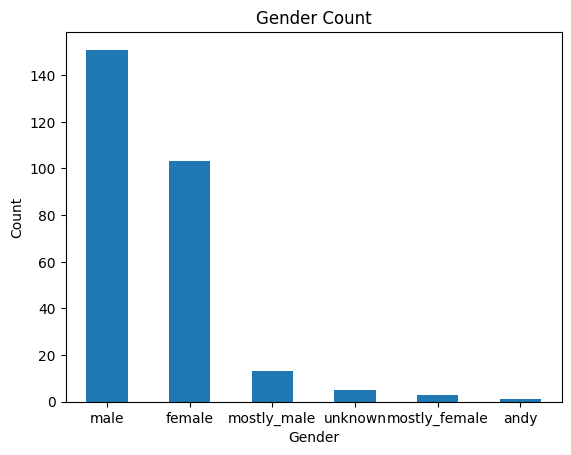

In [328]:
ax = name_entity_data['Gender'].value_counts().plot(kind='bar', rot=0)
ax.set_title('Gender Count')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()


Lets add the fequency of the names and do some visualizing

In [329]:
freq = name_entity_data['Name'].value_counts()
name_entity_data['frequency'] = name_entity_data['Name'].replace(freq)
name_entity_data.head()

,Name,Entity_Type,Gender,Gender_API,frequency
0,Sarah,PERSON,female,unknown,16
1,David,PERSON,male,unknown,12
2,Sarah,PERSON,female,unknown,16
3,Lisa,PERSON,female,unknown,5
4,Mark,PERSON,male,unknown,14


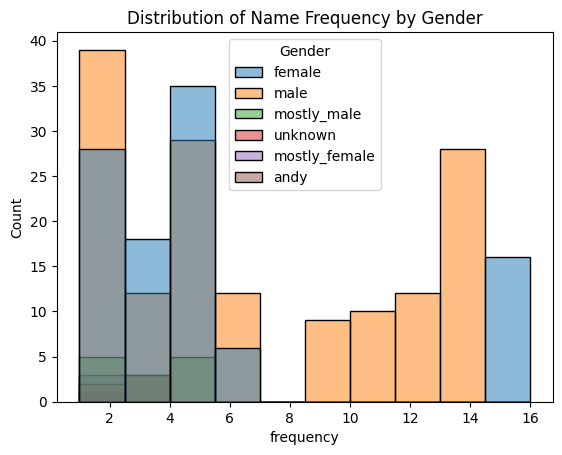

In [330]:
import seaborn as sns

sns.histplot(data=name_entity_data, x='frequency', hue='Gender')
plt.title('Distribution of Name Frequency by Gender')
plt.show()

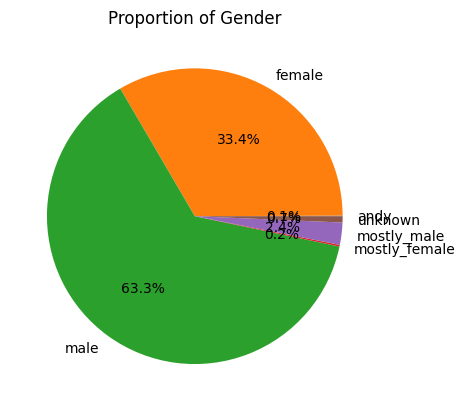

In [331]:
# Calculate the total frequency of each gender
gender_freq = name_entity_data.groupby('Gender')['frequency'].sum()

# Plot a pie chart with gender as labels and frequency as sizes
plt.pie(gender_freq, labels=gender_freq.index, autopct='%1.1f%%')
plt.title('Proportion of Gender')
plt.show()